#**Laboratorio Distribuciones Probabilidad:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####Este laboratorio nos permite estudiar las distribuciones de probabilidad de algunas variables continuas conocidas.

##**Función de densidad de probabilidad:**
Sea $X$ una variable aleatoria continua, y sea $p(x)$ su función de densidad de probabilidad. La función $p(x)$ NO es una probabilidad, pero si nos indica qué tan factible es que los elementos alrededor de $x$ ocurran. Recordemos que la probabilidad de que $X$ tome valores en un intervalo $[a,b]$ está dada por:

$$P(a ≤ X ≤ b)= \int_{a}^{b} p(x)dx. $$


Una función de densidad de probabilidad debe satisfacer:

$$p(x)\ge 0, \ \ \text{para todo $x$,  }$$
$$\int_{-\infty}^{\infty}p(x)dx =1.$$

##**Distribución Uniforme:**

Sea $X$ una variable aleatoria continua. Decimos que esta es una variable aleatoria uniforme si su función de densidad de probabilidad está dada por:

$$p(x)=\dfrac{1}{b-a}$$

para $a \leq x \leq b$, y $p(x)=0$ para el resto. Aquí, se asume que $a$ es menor que $b$. Fácilmente, podemos encontrar que esta función satisface $p(x)\ge 0$ para todo $x$, y la integral en todo el rango de $x$ es 1. El valor esperado de esta distribución está dado por $E[X]=\frac{a+b}{2}$, y la varianza está dada por $E[(X-E[X])^2]=\frac{(b-a)^2}{12}$. La forma de esta distribución se puede observar en la siguiente imagen:



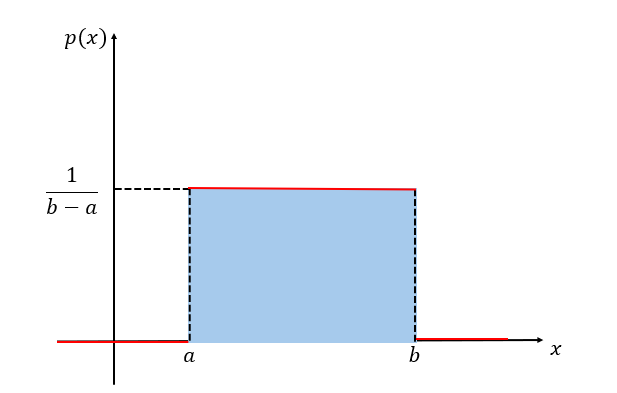

##**Distribucion Normal:**


Sea $X$ una variable aleatoria continua. Decimos que esta es una variable aleatoria Gaussiana o Normal si su función de densidad de probabilidad está dada por:
$$p(x)= \mathcal{N}(x;μ,σ^2)= \dfrac{1}{σ\sqrt{2π}} e^{-\dfrac{(x-μ)^2}{2σ^2}}.$$

donde, $x ∈ \mathbb{R}$, $μ ∈ \mathbb{R} $, y $σ >0$. Aquí, tenemos que el valor esperado de $X$ es $E[X]=\mu$, y la varianza de $X$ es $E[(X-E[X])^2]=\sigma^2$. La siguiente gráfica ilustra la forma de distribución:



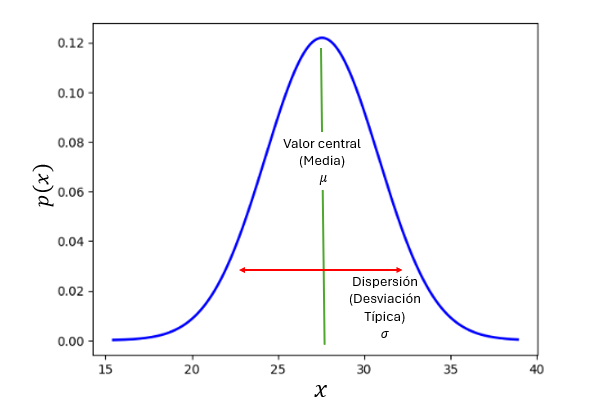

##**Estimación del valor esperado y la varianza:**
Sea $x_i$ la $i$-ésima observación de $X$. El valor esperado $E[X]$ y la varianza $E[(X-E[X])^2]$ se pueden estimar a partir de observaciones usando las siguientes ecuaciones:

$μ= x̄= \dfrac{\sum_{i=1}^{n} x_i}{n}$,

$σ^2= \dfrac{\sum_{i=1}^{n} (x_i- x̄)^2 }{n-1}$.


##**Ejemplo:**

Ahora bien, en el archivo *datos_probabilidad.xlsx* tenemos 1500 observaciones de $X$, para los cuales es necesario intentar determinar su distribucion de probabilidad. Nos indican que la variable aleatoria continua puede que esté distribuida o uniformemente o como una variable gaussiana. Por lo que, empezaremos por gráficar el histograma correspondiente para que podamos ver la forma de su distribución de probabilidad. Aquí, debemos cargar el archivo llamado *datos_probabilidad.xlsx*, el cual contiene una tabla con todas las observaciones.

In [ ]:
# Se importan los datos archivo excel
data = pd.read_excel("datosLab1_parte1.xlsx")


Y ahora graficamos el histograma con 3 bins.

In [ ]:
#Se grafican los datos
plt.hist(data['DATOS'], bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos')
plt.show()

Vemos que la cantidad de bins es muy pequeña para tener una idea de cómo está distribuida la probabilidad de la variable aleatoria $X$. Aumentamos el número de bins a 30.

In [ ]:
#Se grafican los datos
plt.hist(data['DATOS'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos')
plt.show()

Aquí ya nos da una idea de cuál es potencialmente la distribución de probabilidad.

Para seguir con el ejemplo, si asumimos que la variable $X$ sigue una distribución uniforme, comparamos la función de densidad uniforme con la forma del histograma. Para ello primero estimamos los parámetros $a$ y $b$. Una forma (de muchas) para estimar los parámetros $a$ y $b$ de la distribución uniforme es hacer $a$ igual al valor mínimo de los $x_i$, y $b$ el valor máximo de los $x_i$.

In [ ]:
# DISTRIBUCIÓN UNIFORME

#Cálculo de los límites
a = np.min(data)
b = np.max(data)

# Se define la función para generar la función de densidad de probabilidad
def uniforme(x, a, b):
    if a <= x <= b:
        return 1 / (b - a)
    else:
        return 0

#Se define el eje x y se halla la función de densidad con distribución uniforme.
xx=np.linspace(data["DATOS"].min(),data["DATOS"].max(),len(data["DATOS"]))
distr_U = [uniforme(x, a, b) for x in data["DATOS"]]

#Se grafica el histograma y la distrubucion mediante una gráfica con ejes múltiples
fig, axes = plt.subplots()

axes.hist(data['DATOS'], bins=30, color='skyblue', edgecolor='black')
axes.set_xlabel('Valor')
axes.set_ylabel('Frecuencia')

twin_axes = axes.twinx()
twin_axes.plot(xx, distr_U, label="Distribución uniforme", color='red')
twin_axes.set_ylabel('Densidad de probabilidad')
plt.show()


La linea roja representa la función de densidad de probabilidad. Por lo que podemos decir que la distribución uniforme no se ajusta a los datos de archivo, lo cual es obvio ya que su forma no coincide con la del histograma. Probaremos ahora la distribución normal.

Primero estimamos el valor esperado y la varianza de la variable aleatoria $X$:

In [ ]:
#DISTRIBUCIÓN NORMAL

#Función para estimar el valor esperado
def mu(data):
    n = len(data)
    suma = sum(data)
    media = suma / n
    return media

media=mu(data["DATOS"])

#Función para estimar la desviación estándar
def sigma(data):
    media = mu(data)
    n = len(data)
    suma_cuadrados_diff = sum((x - media) ** 2 for x in data)
    desviacion_estandar = np.sqrt(suma_cuadrados_diff / n-1)
    return desviacion_estandar

desv_est=sigma(data["DATOS"])


print("La media de la muestra es : ", media ,"y la desviación estándar es: ", desv_est )

Y ahora graficamos la función de densidad de probabilidad Gaussiana con los parámetros estimados, y comparamos su forma con el histograma generado a partir de los datos:

In [ ]:
# Función para la distribución normal
def distr_normal(x, media, desv_est):
    constante = 1 / (desv_est * np.sqrt(2 * np.pi))
    exponente = -((x - media)**2) / (2 * desv_est**2)
    distr = constante * np.exp(exponente)
    return distr

#Se define el eje x y se halla la función de densidad para la distribución normal.
xx=np.linspace(data["DATOS"].min(),data["DATOS"].max(),len(data["DATOS"]))
distr_N =[distr_normal(x, media, desv_est)  for x in xx]

#Se grafica el histograma y la distrubucipon mediante una gráfica con ejes múltiples
fig, axes = plt.subplots()

axes.hist(data['DATOS'], bins=30, color='skyblue', edgecolor='black')
axes.set_xlabel('Valor')
axes.set_ylabel('Frecuencia')

twin_axes = axes.twinx()
twin_axes.plot(xx, distr_N, label="Distribución uniforme", color='red')
twin_axes.set_ylabel('Densidad de probabilidad')
plt.show()


Vemos que la función de densidad de probabilidad para una distribución normal (línea roja) se ajusta mejor a los datos del histograma, por lo que podríamos decir en este ejercicio que la variable $X$ potencialmente es una variable aleatoria Gaussiana.

##**Ejercicio:**

Consiere los datos del archivo *datosLab1_parte2.xlsx*. Estos son son observaciones de una variable aleatoria exponencial. Para ello replique el procedimiento utilizado en el ejemplo anterior.


Para el desarrollo del ejercicio, recordemos que una variable aleatoria exponencial es una variable aleatoria continua que tiene una función de densidad de probabilidad:
$$p(x)= λ e^{(-λ x)},$$

donde $x ≥ 0$ y $λ > 0$, siendo $λ$ el parámetro de la distribución exponencial.

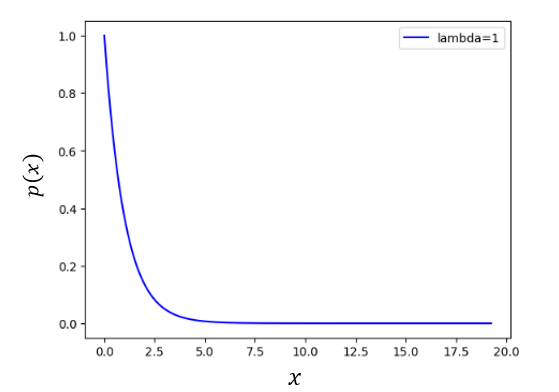

A continuación se muestra en código una función para esta distribución de densidad de probabilidad con la que podrá estimar si los datos pueden tener una distribución exponencial.

In [ ]:
##Función exponencial

def distr_exp(data, l):
    return l * np.exp(-l * data)


# Definición del parámetro lambda
l= 0.4


##**Solución ejercicio:**